# Import tensorflow and dataset
Using a Convolutional Neural Network that better suited for image processing. CNN's are less sensitive to where in the image the pattern we're looking for with multi-layer percetron.

In [1]:
import tensorflow

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop

Load up our raw data set.

In [3]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data() 

11493376/11490434 [==============================] - 5s 0us/step


In [4]:
from tensorflow.keras import backend as K
if K.image_data_format() == 'channels_first':
    train_images = mnist_train_images.reshape(mnist_train_images.shape[0], 1, 28, 28)
    test_images = mnist_test_images.reshape(mnist_test_images.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    train_images = mnist_train_images.reshape(mnist_train_images.shape[0], 28, 28, 1)
    test_images = mnist_test_images.reshape(mnist_test_images.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255
    
    

As before we need to convert our train and test labels to be categorical in one_hot format:

In [5]:
train_labels =tensorflow.keras.utils.to_categorical(mnist_train_labels, 10)
test_labels =tensorflow.keras.utils.to_categorical(mnist_test_labels, 10)

# Training
print out one of the training images with its label:

In [6]:
import matplotlib.pyplot as plt

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


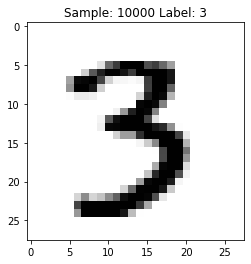

In [7]:
def display_sample(num):
    #Print the one-hot array of this sample's label
    print(train_labels[num])
    #Print the labels converted back to a number
    label = train_labels[num].argmax(axis=0)
    #Reshape the 786 values to a 28x28 image
    image = train_images[num].reshape([28,28])
    plt.title('Sample: %d Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
display_sample(10000)

Now for the meat of the problem, Setting up a CNN involves more layers. Not all of these are strictly necessary; we could run without pooling and dropout, but those extra steps help avoid overfitting and helps things run faster.

we'll start with a 2D convolution of the image- it's set up to take 32 windows, or filters, of each image, each filter being 3x3 in size.

We run a second convolution on top of that with 64 3x3 windows- this topology is just what comes recommended within keras's own example. Again we want to re-use previous research whenever possible while tuning CNN, as is hard to do.

Next we Apply MaxPooling2D layer that takes the maximum of each 2x2 result to distill the results down into something more manageable.

A dropout filter is then applied to prevent overfitting.

Next we Flatten the 2D layer we have at this stage into 1D layer.

Then applying dropout again to further prevent overfitting

And finally, we feed into our final 10 units where softmax is applied to choose our category of 0-9.

In [14]:
model = Sequential()
model.add(Conv2D(32, kernel_size =(3, 3),
                 activation='relu',
                 input_shape=input_shape))
# 64  3x3 kernels
model.add(Conv2D(64, (3, 3), activation='relu'))
# Reduce by taking the maxof each 2x2 block
model.add(MaxPooling2D(pool_size=(2,2)))
# Dropout to avoid overfitting
model.add(Dropout(0.25))
# Flatten the results to one dimension for passing into our final layer
model.add(Flatten())
# A hidden layer to learn with
model.add(Dense(128, activation='relu'))
# Another dropout
model.add(Dropout(0.5))
# Final categorization from 0-9 with software
model.add(Dense(10, activation='softmax'))

Model Description

In [15]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)              

# Testing

In [16]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

This takes long time to run, print progress as each epoch is run.

In [17]:
history = model.fit(train_images, train_labels,
                   batch_size=32,
                   epochs=10,
                   verbose=2,
                   validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 - 65s - loss: 0.1869 - accuracy: 0.9433 - val_loss: 0.0444 - val_accuracy: 0.9850
Epoch 2/10
1875/1875 - 76s - loss: 0.0789 - accuracy: 0.9767 - val_loss: 0.0423 - val_accuracy: 0.9866
Epoch 3/10
1875/1875 - 79s - loss: 0.0622 - accuracy: 0.9814 - val_loss: 0.0311 - val_accuracy: 0.9904
Epoch 4/10
1875/1875 - 78s - loss: 0.0509 - accuracy: 0.9845 - val_loss: 0.0294 - val_accuracy: 0.9907
Epoch 5/10
1875/1875 - 78s - loss: 0.0435 - accuracy: 0.9865 - val_loss: 0.0298 - val_accuracy: 0.9911
Epoch 6/10
1875/1875 - 78s - loss: 0.0376 - accuracy: 0.9877 - val_loss: 0.0261 - val_accuracy: 0.9918
Epoch 7/10
1875/1875 - 79s - loss: 0.0312 - accuracy: 0.9902 - val_loss: 0.0260 - val_accuracy: 0.9916
Epoch 8/10
1875/1875 - 78s - loss: 0.0280 - accuracy: 0.9908 - val_loss: 0.0241 - val_accuracy: 0.9930
Epoch 9/10
1875/1875 - 79s - loss: 0.0256 - accuracy: 0.9920 - val_loss: 0.0285 - val_accuracy: 0.9924
Epoch 10/10
1875/1875 - 79s - loss: 0.0237 - accuracy: 0.9921 - val_loss:

# Result

In [19]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:',score[0])
print('Test accuracy:', score[1])

Test loss: 0.031333744525909424
Test accuracy: 0.9919999837875366


It has good accuracy of 99% but in real world it is not worth. If we building something where life and death are on the line like a self-driving car every fraction of percent matters.